<a href="https://colab.research.google.com/github/olyaspasibo/ML/blob/master/mnist_keras_perceptron_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
np.random.seed(7)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

In [0]:
y_train.shape

In [0]:
X_train[0]

In [0]:
y_train[0]

Populating the interactive namespace from numpy and matplotlib


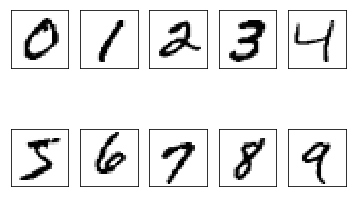

In [4]:
%pylab inline
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
  img = X_train[y_train == i][0].reshape(28,28)
  ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
show()

In [0]:
# flatten  28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
X_train.shape

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
X_train[0]

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_train.shape

In [0]:
y_train[0]

In [0]:
def build_model(optimizer='sgd'):
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [9]:
sgd_model = build_model()

W0814 13:07:58.091815 140593012938624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 13:07:58.132800 140593012938624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 13:07:58.141115 140593012938624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0814 13:07:58.175595 140593012938624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 13:07:58.204431 140593012938624 deprecation_wrapper.

In [10]:
sgd_model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 784,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
    'kernel_regularizer': None,
    'name': 'dense_2',
    'trainable':

In [11]:
# train the model
sgd_history = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

W0814 13:08:05.313390 140593012938624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 13:08:05.368833 140593012938624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 1.1959 - acc: 0.7213 - val_loss: 0.7011 - val_acc: 0.8515
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.6046 - acc: 0.8589 - val_loss: 0.4957 - val_acc: 0.8819
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4769 - acc: 0.8796 - val_loss: 0.4186 - val_acc: 0.8931
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4183 - acc: 0.8909 - val_loss: 0.3774 - val_acc: 0.9002
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.3832 - acc: 0.8973 - val_loss: 0.3511 - val_acc: 0.9055
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.3590 - acc: 0.9025 - val_loss: 0.3326 - val_acc: 0.9085
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3410 - acc: 0.9061 - val_loss: 0.3169 - val_acc

In [12]:
# final evaluation of the model
sgd_scores = sgd_model.evaluate(X_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-sgd_scores[1]*100))

10000/10000 [==============================] - 1s 68us/step
Baseline Error: 7.79%


In [0]:
sgd_history

In [0]:
# list all data in history
sgd_history.history.keys()

In [0]:
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
# summarize history for accuracy
plt.plot(sgd_history.history['acc'])
plt.plot(sgd_history.history['val_acc'])
plt.title('sgd model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# summarize history for loss
plt.plot(sgd_history.history['loss'])
plt.plot(sgd_history.history['val_loss'])
plt.title('sgd model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
image_index = 370
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')

In [0]:
pred = sgd_model.predict(X_test[image_index].reshape(1, 28*28))
pred

In [0]:
np.argmax(pred)

In [13]:
%%time
adam_model = build_model(optimizer='adam')
adam_history = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
adam_scores = adam_model.evaluate(X_test, y_test, verbose=1)
print("Baseline Error: %.2f%%" % (100-adam_scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2793 - acc: 0.9190 - val_loss: 0.1427 - val_acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1097 - acc: 0.9681 - val_loss: 0.0927 - val_acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0709 - acc: 0.9797 - val_loss: 0.0768 - val_acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0499 - acc: 0.9850 - val_loss: 0.0705 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0358 - acc: 0.9900 - val_loss: 0.0675 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0251 - acc: 0.9934 - val_loss: 0.0667 - val_acc: 0.9785
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0193 - acc: 0.9949 - val_loss: 0.0588 - 

In [0]:
# summarize history for accuracy
plt.plot(adam_history.history['acc'])
plt.plot(adam_history.history['val_loss'])
plt.title('adam model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# summarize history for loss
plt.plot(adam_history.history['loss'])
plt.plot(adam_history.history['val_loss'])
plt.title('adam model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
image_index = 370
plt.imshow(X_test[image_index]).reshape(28, 28), cmap='Greys')

In [0]:

pred = adam_model.predict(X_test[image_index].reshape(1, 28*28))
pred

In [0]:
np.argmax(pred)